In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Correctness Test
from https://github.com/onnx/onnx/blob/main/docs/Operators.md#DynamicQuantizeLinear

In [2]:
# Test Case 1
X = np.array([0, 2, -3, -2.5, 1.34, 0.5]).astype(np.float32)
x_min = np.minimum(0, np.min(X))
x_max = np.maximum(0, np.max(X))
Y_Scale = np.float32((x_max - x_min) / (255 - 0))  # uint8 -> [0, 255]
Y_ZeroPoint = np.clip(round((0 - x_min) / Y_Scale), 0, 255).astype(np.uint8)
Y = np.clip(np.round(X / Y_Scale) + Y_ZeroPoint, 0, 255).astype(np.uint8)

print("Y_Scale: ", Y_Scale, ", Y_ZeroPoint: ", Y_ZeroPoint)
print("Y: ", Y)

Y_Scale:  0.019607844 , Y_ZeroPoint:  153
Y:  [153 255   0  26 221 179]


In [3]:
# Test Case 2
X = np.array([-1.0, -2.1, -1.3, -2.5, -3.34, -4.0]).astype(np.float32)
x_min = np.minimum(0, np.min(X))
x_max = np.maximum(0, np.max(X))
Y_Scale = np.float32((x_max - x_min) / (255 - 0))  # uint8 -> [0, 255]
Y_ZeroPoint = np.clip(round((0 - x_min) / Y_Scale), 0, 255).astype(np.uint8)
Y = np.clip(np.round(X / Y_Scale) + Y_ZeroPoint, 0, 255).astype(np.uint8)

print("Y_Scale: ", Y_Scale, ", Y_ZeroPoint: ", Y_ZeroPoint)
print("Y: ", Y)

Y_Scale:  0.015686275 , Y_ZeroPoint:  255
Y:  [191 121 172  96  42   0]


In [4]:
# Test Case 3
X = (
    np.array([1, 2.1, 1.3, 2.5, 3.34, 4.0, 1.5, 2.6, 3.9, 4.0, 3.0, 2.345])
    .astype(np.float32)
    .reshape((3, 4))
)

# expected scale 0.0156862754 and zero point 0
x_min = np.minimum(0, np.min(X))
x_max = np.maximum(0, np.max(X))
Y_Scale = np.float32((x_max - x_min) / (255 - 0))  # uint8 -> [0, 255]
Y_ZeroPoint = np.clip(round((0 - x_min) / Y_Scale), 0, 255).astype(np.uint8)
Y = np.clip(np.round(X / Y_Scale) + Y_ZeroPoint, 0, 255).astype(np.uint8)

print("Y_Scale: ", Y_Scale, ", Y_ZeroPoint: ", Y_ZeroPoint)
print("Y: ", Y)

Y_Scale:  0.015686275 , Y_ZeroPoint:  0
Y:  [[ 64 134  83 159]
 [213 255  96 166]
 [249 255 191 149]]


## Optimization Method Comparision

In [52]:
# read data
df = pd.read_csv("performance.csv", header=None, 
                 names = ['naive', 'omp', 'omp_tiling', 'omp_avx', 
                          'omp_avx512', 'omp_avx512_fused'])
df.head()

,naive,omp,omp_tiling,omp_avx,omp_avx512,omp_avx512_fused
0,13.956347,0.818263,0.879274,0.401769,0.398064,0.410037
1,13.971352,0.842235,0.880167,0.410642,0.405039,0.400673
2,13.995570,0.940417,0.877656,0.349971,0.418020,0.389262
3,14.028488,0.723770,0.852373,0.387864,0.414938,0.404052
4,14.044231,0.790120,0.783126,0.380312,0.386257,0.429286


In [53]:
print("Average Runtime(s):")
df.mean()

Average Runtime(s):


naive               14.035129
omp                  0.795125
omp_tiling           0.843709
omp_avx              0.404016
omp_avx512           0.405025
omp_avx512_fused     0.409883
dtype: float64

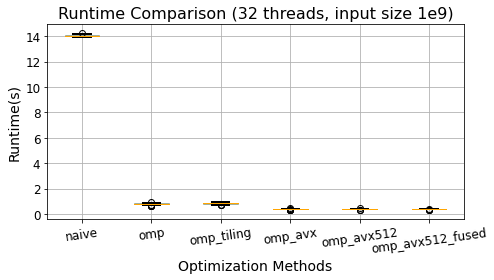

In [58]:
plt.figure(figsize=(7, 4))

boxprops = dict(color='gray', facecolor='green', alpha=0.5)
whiskerprops = dict(linestyle='--', linewidth=1.5, color='gray')
capprops = dict(linestyle='-', linewidth=2, color='black')

# Create boxplot
ax = df.boxplot(color=dict(boxes='red', whiskers='black', medians='orange', caps='gray'), 
                boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, patch_artist=True)

# Add labels and title
ax.set_xlabel('Optimization Methods', fontsize=14)
ax.set_ylabel('Runtime(s)', fontsize=14)
ax.set_title('Runtime Comparison (32 threads, input size 1e9)', fontsize=16)

plt.xticks(fontsize=12, rotation=8)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
# scatter average point

In [55]:
df_speedup = df[df.columns[1:]].apply(lambda x: df.iloc[:, 0] / x)
df_speedup.mean()

omp                 17.771748
omp_tiling          16.710921
omp_avx             34.840111
omp_avx512          34.743013
omp_avx512_fused    34.329891
dtype: float64

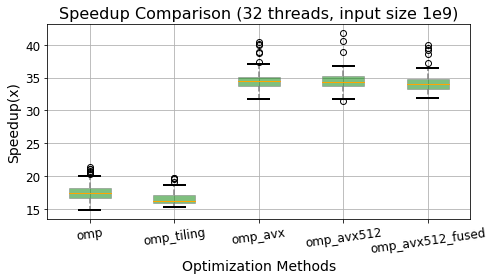

In [56]:
plt.figure(figsize=(7, 4))

boxprops = dict(color='gray', facecolor='green', alpha=0.5)
whiskerprops = dict(linestyle='--', linewidth=1.5, color='gray')
capprops = dict(linestyle='-', linewidth=2, color='black')

ax = df_speedup.boxplot(color=dict(boxes='red', whiskers='black', medians='orange', caps='gray'), 
                boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, patch_artist=True)

ax.set_xlabel('Optimization Methods', fontsize=14)
ax.set_ylabel('Speedup(x)', fontsize=14)
ax.set_title('Speedup Comparison (32 threads, input size 1e9)', fontsize=16)

plt.xticks(fontsize=12, rotation=8)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


# scatter average point

## Input Matrix Size Comparison

In [ ]:
# TODO

## Scalability

In [ ]:
# TODO

# threads: 1, 4, 8, 16, 32, 64

# boxplot

# plot average point